In [1]:
pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1MB 2.7MB/s 


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

In [3]:
# Image
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

40960/39781 [==============================] - 0s 3us/step


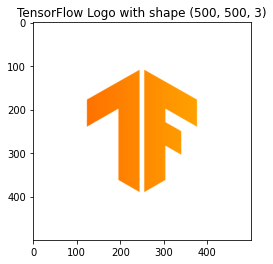

In [4]:
# Display Image
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])

plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)

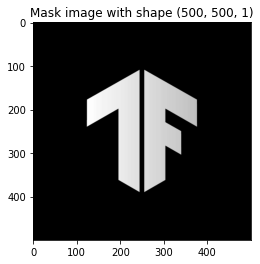

In [5]:
# RGB to Greyscale

bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap = 'gray')

### Mean filtering

Mean filtering is a filtering technique, which is often used to remove noise from an image or signal. The idea is to run through the image pixel by pixel and replacing it with the average values of neighboring pixels.

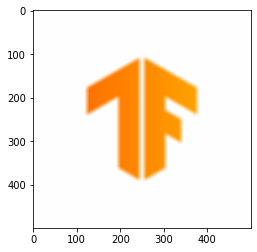

In [6]:
mean = tfa.image.mean_filter2d(img, filter_shape = 11)
_ = plt.imshow(mean)